In [4]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Load and Explore the Data
df = pd.read_csv("Dataset/Heart Prediction Quantum Dataset.csv")


*Display the first few rows of the dataset*

In [6]:
print(df.head())

    Age  Gender  BloodPressure  Cholesterol  HeartRate  QuantumPatternFeature  \
0  68.0       1          105.0        191.0      107.0               8.362241   
1  58.0       0           97.0        249.0       89.0               9.249002   
2  44.0       0           93.0        190.0       82.0               7.942542   
3  72.0       1           93.0        183.0      101.0               6.495155   
4  37.0       0          145.0        166.0      103.0               7.653900   

   HeartDisease  
0             1  
1             0  
2             1  
3             1  
4             1  


 *Check the shape of the dataset*

In [3]:
print("Shape of the dataset:", df.shape)


Shape of the dataset: (500, 7)


*Check for missing values*

In [4]:
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 Age                      0
Gender                   0
BloodPressure            0
Cholesterol              0
HeartRate                0
QuantumPatternFeature    0
HeartDisease             0
dtype: int64


# Step 2: Data Visualization
*Visualize the distribution of the target variable*

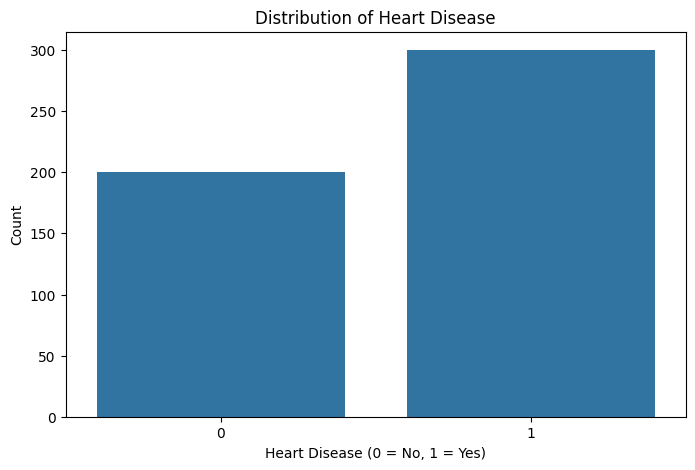

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


*Explanation for the user*

In [6]:
print("The bar chart above shows the distribution of heart disease in the dataset.")
print("The x-axis represents the target variable 'HeartDisease':")
print(" - 0 indicates no heart disease.")
print(" - 1 indicates the presence of heart disease.")
print("The y-axis shows the count of occurrences for each category.")

The bar chart above shows the distribution of heart disease in the dataset.
The x-axis represents the target variable 'HeartDisease':
 - 0 indicates no heart disease.
 - 1 indicates the presence of heart disease.
The y-axis shows the count of occurrences for each category.


*Visualize correlations between features*

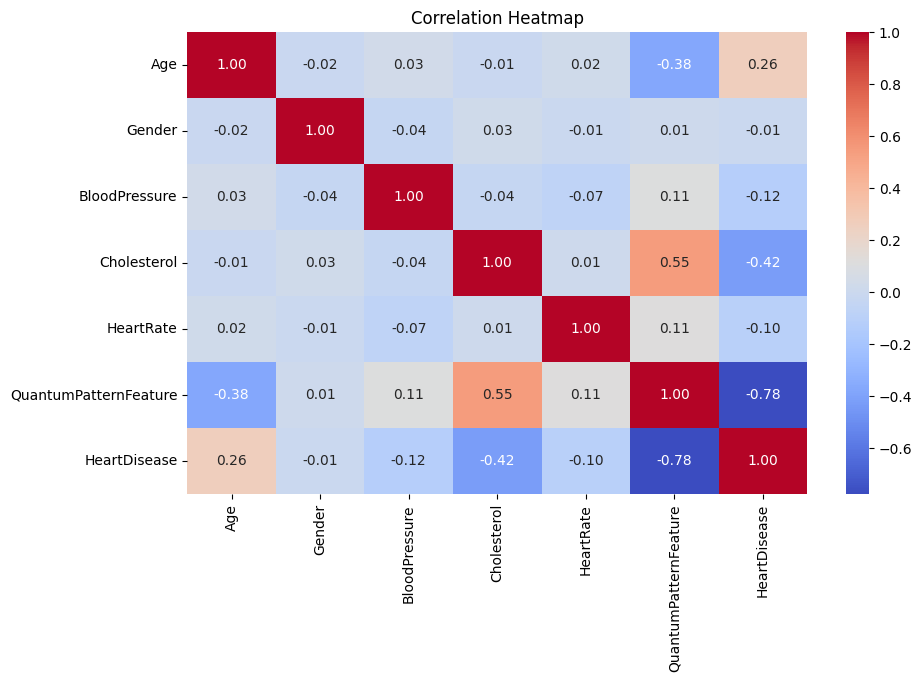

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

*Explanation for the user*

In [8]:

print("The heatmap above shows the correlation between different features in the dataset.")
print("The values range from -1 to 1:")
print(" - A value close to 1 indicates a strong positive correlation (as one feature increases, the other also increases).")
print(" - A value close to -1 indicates a strong negative correlation (as one feature increases, the other decreases).")
print(" - A value around 0 indicates no correlation.")
print("The diagonal values are always 1, as they represent the correlation of each feature with itself.")

The heatmap above shows the correlation between different features in the dataset.
The values range from -1 to 1:
 - A value close to 1 indicates a strong positive correlation (as one feature increases, the other also increases).
 - A value close to -1 indicates a strong negative correlation (as one feature increases, the other decreases).
 - A value around 0 indicates no correlation.
The diagonal values are always 1, as they represent the correlation of each feature with itself.


# Step 3: Data Preparation
*Handle missing values by imputing with the mean for numerical features*

In [9]:
imputer = SimpleImputer(strategy='mean')
df[['Age', 'BloodPressure', 'Cholesterol', 'HeartRate', 'QuantumPatternFeature']] = imputer.fit_transform(
    df[['Age', 'BloodPressure', 'Cholesterol', 'HeartRate', 'QuantumPatternFeature']]
)

*Define features and target variable*

In [10]:

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

*Normalize the features*

In [11]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

*Split the dataset into training and testing sets*

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Create and Train the KNN Model


In [14]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

*Save the model and scaler*

In [15]:

joblib.dump(knn, "knn_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

# Step 5: Validate the model using cross-validation

In [16]:

scores = cross_val_score(knn, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)

Cross-validation scores: [0.775  0.8625 0.825  0.85   0.8625]


# Step 6: Model Evaluation

In [17]:

y_pred = knn.predict(X_test)

*Print evaluation metrics*


In [18]:

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[38  2]
 [ 5 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92        40
           1       0.96      0.92      0.94        60

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100

Accuracy Score: 0.93


*Hyperparameter Tuning*

In [20]:

param_grid = {'n_neighbors': np.arange(1, 20)}
knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

print("Best K value:", knn_gscv.best_params_)

Best K value: {'n_neighbors': np.int64(16)}


# Step 7: Load the scaler and model for user input

In [21]:

scaler = joblib.load("scaler.pkl")  # Load the scaler used for training
knn_model = joblib.load("knn_model.pkl")  # Load the trained KNN model

*Calculate mean values for filling missing user input*


In [22]:

mean_values = df.mean()


# Step 8: Collect user input with validation

In [ ]:
while True:
    print("\nPlease provide the following information to assess your heart disease risk:")
    age = input("Enter your age (leave blank if unknown): ")
    gender = input("Enter your gender (0 for Female, 1 for Male, leave blank if unknown): ")
    blood_pressure = input("Enter your blood pressure level (leave blank if unknown): ")
    cholesterol = input("Enter your cholesterol level (leave blank if unknown): ")
    heart_rate = input("Enter your heart rate (in bpm, leave blank if unknown): ")
    quantum_pattern_feature = input("Enter your quantum pattern feature value (leave blank if unknown): ")

    # Check if all fields are blank
    if not (age or gender or blood_pressure or cholesterol or heart_rate or quantum_pattern_feature):
        restart = input("Oops! It seems you haven't entered anything at all. Would you like to restart this process? (yes/no): ")
        if restart.lower() != 'yes':
            print("Exiting the process.")
            break
        else:
            continue  # Restart the input collection

    # Create a DataFrame for the input data
    user_data = pd.DataFrame({
        'Age': [age if age else None],
        'Gender': [gender if gender else None],
        'BloodPressure': [blood_pressure if blood_pressure else None],
        'Cholesterol': [cholesterol if cholesterol else None],
        'HeartRate': [heart_rate if heart_rate else None],
        'QuantumPatternFeature': [quantum_pattern_feature if quantum_pattern_feature else None]
    })
   # Convert user input to numeric, handling errors
    user_data = user_data.apply(pd.to_numeric, errors='coerce')

    # Check for missing values and inform the user
    if user_data.isnull().any().any():
        print("Warning: Some input values are missing. The prediction may be inaccurate. Please seek professional advice.")

    # Fill missing values with the mean for scaling
    user_data.fillna(mean_values, inplace=True)

    # Scale the input data
    user_data_scaled = scaler.transform (user_data)

    # Step 9: Make prediction
    prediction = knn_model.predict(user_data_scaled)

    # Interpret the prediction
    result = "You are at risk for heart disease." if prediction[0] == 1 else "You are not at risk for heart disease."

    # Display the result
    print("\nPrediction Result:")
    print(result)

    # Step 10: Visualize User Input and Prediction
    plt.figure(figsize=(10, 6))
    plt.bar(user_data.columns, user_data.values.flatten(), color='skyblue')
    plt.title('User  Input Data')
    plt.ylabel('Value')
    plt.xlabel('Features')

    # Add mean lines for reference
    for i, column in enumerate(user_data.columns):
        plt.axhline(y=mean_values[column], color='r', linestyle='--', label=f'Mean {column}' if i == 0 else "")

    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

     # Ask the user if they want to redo the process
    redo = input("Would you like to redo the process? (yes/no): ")
    if redo.lower() == 'yes':
        continue  # Restart the input collection
    else:
        print("Thank you for using the heart disease risk assessment tool. Have a nice day!")
        break  # Exit the loop and end the program

# RUN FULL Code below for Optimal Output: 

   Age  Gender  BloodPressure  Cholesterol  HeartRate  QuantumPatternFeature  \
0   68       1            105          191        107               8.362241   
1   58       0             97          249         89               9.249002   
2   44       0             93          190         82               7.942542   
3   72       1             93          183        101               6.495155   
4   37       0            145          166        103               7.653900   

   HeartDisease  
0             1  
1             0  
2             1  
3             1  
4             1  
Shape of the dataset: (500, 7)
Missing values in each column:
 Age                      0
Gender                   0
BloodPressure            0
Cholesterol              0
HeartRate                0
QuantumPatternFeature    0
HeartDisease             0
dtype: int64


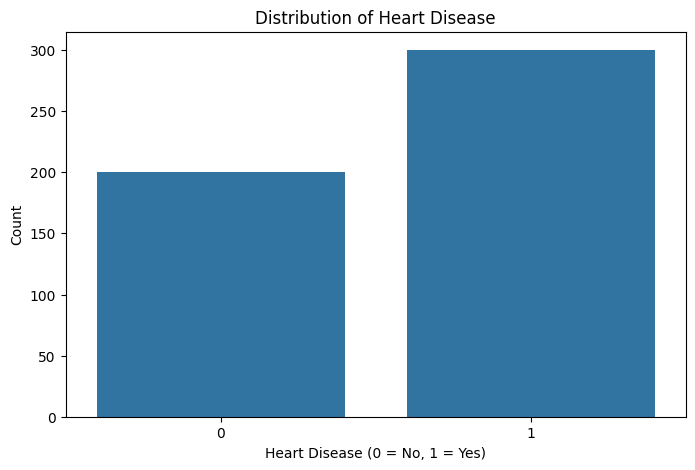


--- Understanding the Distribution of Heart Disease ---
The bar chart above illustrates the distribution of heart disease cases in the dataset.
The x-axis represents the target variable 'HeartDisease':
 - 0 indicates that the individual does not have heart disease.
 - 1 indicates that the individual has heart disease.
The y-axis shows the count of occurrences for each category, allowing you to see how many individuals fall into each group.


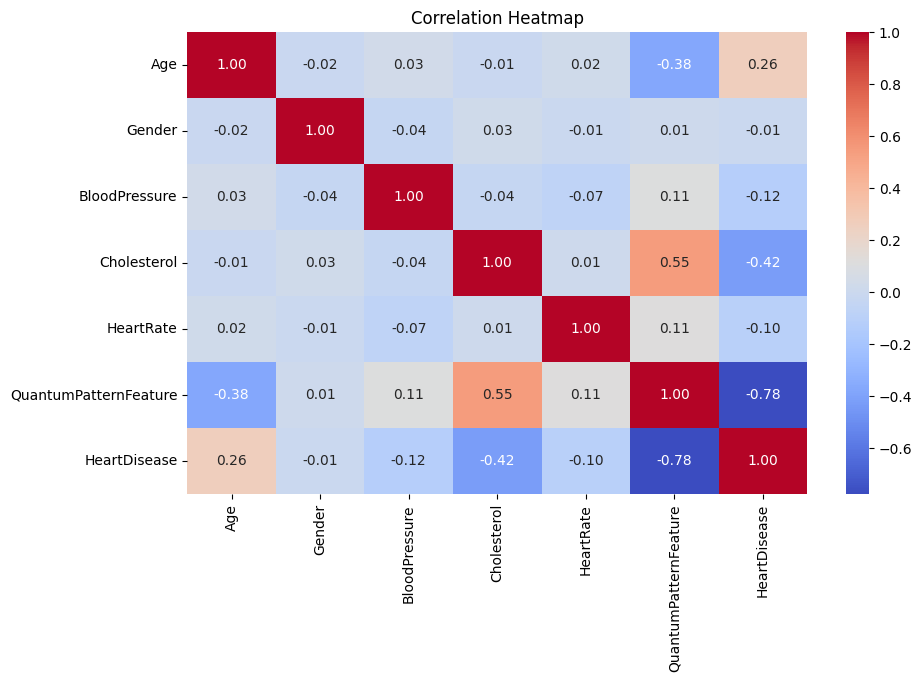


--- Understanding the Correlation Heatmap ---
The heatmap above displays the correlation between different features in the dataset.
Correlation values range from -1 to 1:
 - A value close to 1 indicates a strong positive correlation (as one feature increases, the other also increases).
 - A value close to -1 indicates a strong negative correlation (as one feature increases, the other decreases).
 - A value around 0 indicates no correlation between the features.
The diagonal values are always 1, as they represent the correlation of each feature with itself.
Cross-validation scores: [0.775  0.8625 0.825  0.85   0.8625]
Confusion Matrix:
 [[38  2]
 [ 5 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92        40
           1       0.96      0.92      0.94        60

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0

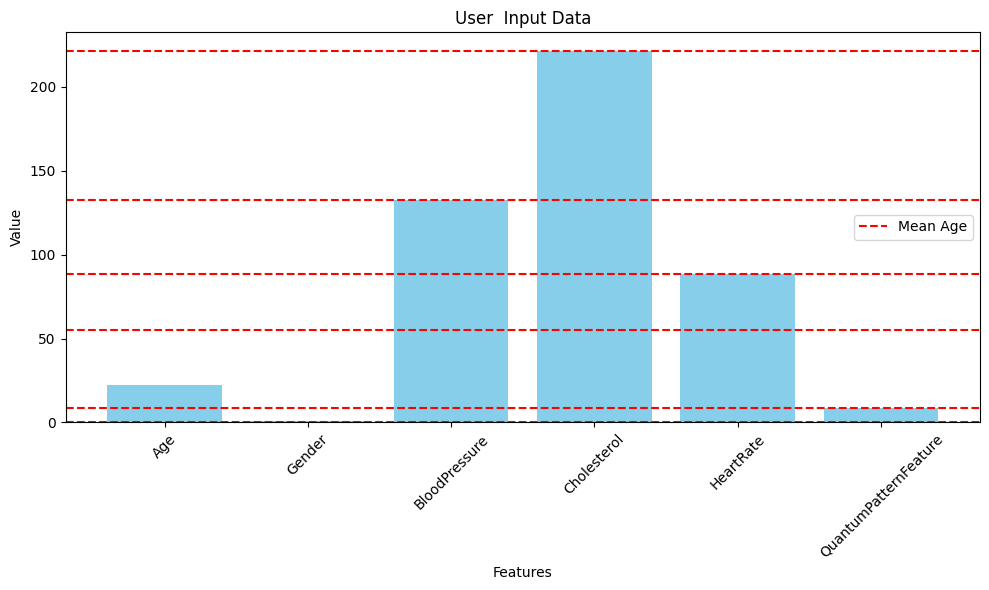

Thank you for using the heart disease risk assessment tool. Have a nice day!


In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Load and Explore the Data
df = pd.read_csv("Dataset/Heart Prediction Quantum Dataset.csv")

# Display the first few rows of the dataset
print(df.head())

# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Step 2: Data Visualization
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Explanation for the user
print("The bar chart above shows the distribution of heart disease in the dataset.")
print("The x-axis represents the target variable 'HeartDisease':")
print(" - 0 indicates no heart disease.")
print(" - 1 indicates the presence of heart disease.")
print("The y-axis shows the count of occurrences for each category.")

# Visualize correlations between features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Explanation for the user
print("The heatmap above shows the correlation between different features in the dataset.")
print("The values range from -1 to 1:")
print(" - A value close to 1 indicates a strong positive correlation (as one feature increases, the other also increases).")
print(" - A value close to -1 indicates a strong negative correlation (as one feature increases, the other decreases).")
print(" - A value around 0 indicates no correlation.")
print("The diagonal values are always 1, as they represent the correlation of each feature with itself.")

# Step 3: Data Preparation
# Handle missing values by imputing with the mean for numerical features
imputer = SimpleImputer(strategy='mean')
df[['Age', 'BloodPressure', 'Cholesterol', 'HeartRate', 'QuantumPatternFeature']] = imputer.fit_transform(
    df[['Age', 'BloodPressure', 'Cholesterol', 'HeartRate', 'QuantumPatternFeature']]
)

# Define features and target variable
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Create and Train the KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Save the model and scaler
joblib.dump(knn, "knn_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# Step 5: Validate the model using cross-validation
scores = cross_val_score(knn, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)

# Step 6: Model Evaluation
y_pred = knn.predict(X_test)

# Print evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Hyperparameter Tuning
param_grid = {'n_neighbors': np.arange(1, 20)}
knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

print("Best K value:", knn_gscv.best_params_)

# Step 7: Load the scaler and model for user input
scaler = joblib.load("scaler.pkl")  # Load the scaler used for training
knn_model = joblib.load("knn_model.pkl")  # Load the trained KNN model

# Calculate mean values for filling missing user input
mean_values = df.mean()

# Step 8: Collect user input with validation
while True:
    print("\nPlease provide the following information to assess your heart disease risk:")
    age = input("Enter your age (leave blank if unknown): ")
    gender = input("Enter your gender (0 for Female, 1 for Male, leave blank if unknown): ")
    blood_pressure = input("Enter your blood pressure level (leave blank if unknown): ")
    cholesterol = input("Enter your cholesterol level (leave blank if unknown): ")
    heart_rate = input("Enter your heart rate (in bpm, leave blank if unknown): ")
    quantum_pattern_feature = input("Enter your quantum pattern feature value (leave blank if unknown): ")

    # Check if all fields are blank
    if not (age or gender or blood_pressure or cholesterol or heart_rate or quantum_pattern_feature):
        restart = input("Oops! It seems you haven't entered anything at all. Would you like to restart this process? (yes/no): ")
        if restart.lower() != 'yes':
            print("Exiting the process.")
            break
        else:
            continue  # Restart the input collection

    # Create a DataFrame for the input data
    user_data = pd.DataFrame({
        'Age': [age if age else None],
        'Gender': [gender if gender else None],
        'BloodPressure': [blood_pressure if blood_pressure else None],
        'Cholesterol': [cholesterol if cholesterol else None],
        'HeartRate': [heart_rate if heart_rate else None],
        'QuantumPatternFeature': [quantum_pattern_feature if quantum_pattern_feature else None]
    })

    # Convert user input to numeric, handling errors
    user_data = user_data.apply(pd.to_numeric, errors='coerce')

    # Check for missing values and inform the user
    if user_data.isnull().any().any():
        print("Warning: Some input values are missing. The prediction may be inaccurate. Please seek professional advice.")

    # Fill missing values with the mean for scaling
    user_data.fillna(mean_values, inplace=True)

    # Scale the input data
    user_data_scaled = scaler.transform (user_data)

    # Step 9: Make prediction
    prediction = knn_model.predict(user_data_scaled)

    # Interpret the prediction
    result = "You are at risk for heart disease." if prediction[0] == 1 else "You are not at risk for heart disease."

    # Display the result
    print("\nPrediction Result:")
    print(result)

    # Step 10: Visualize User Input and Prediction
    plt.figure(figsize=(10, 6))
    plt.bar(user_data.columns, user_data.values.flatten(), color='skyblue')
    plt.title('User  Input Data')
    plt.ylabel('Value')
    plt.xlabel('Features')

    # Add mean lines for reference
    for i, column in enumerate(user_data.columns):
        plt.axhline(y=mean_values[column], color='r', linestyle='--', label=f'Mean {column}' if i == 0 else "")

    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

     # Ask the user if they want to redo the process
    redo = input("Would you like to redo the process? (yes/no): ")
    if redo.lower() == 'yes':
        continue  # Restart the input collection
    else:
        print("Thank you for using the heart disease risk assessment tool. Have a nice day!")
        break  # Exit the loop and end the program